#  Milestone 5: Advanced Model Development  

### 🎯 Objective  
Train and evaluate advanced machine learning models (**XGBoost** and **LightGBM**) for **dynamic ride price prediction** using engineered features and historical data.  

In [6]:
#  MILESTONE 5: ADVANCED MODEL DEVELOPMENT

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

pd.options.display.float_format = '{:.4f}'.format



###  Step 2: Data Loading and Feature Engineering

In this step, 
- Load the **dynamic pricing dataset**.
- Handle missing values.
- Engineer new meaningful features to enhance model learning.
- Apply transformations to improve data quality and model stability.

In [7]:

X = df.drop(['Historical_Cost_of_Ride'], axis=1)
y = df['Historical_Cost_of_Ride']
# Load dataset
df = pd.read_csv("dynamic_pricing.csv")
print("✅ Data Loaded:", df.shape)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Derived features
df['Demand_Supply_Ratio'] = df['Number_of_Riders'] / (df['Number_of_Drivers'] + 1)
df['Ride_Experience'] = df['Number_of_Past_Rides'] * df['Average_Ratings']

# Log transform target to stabilize variance
df['Historical_Cost_of_Ride'] = np.log1p(df['Historical_Cost_of_Ride'])

# Encode categorical features
loyalty_order = {'Regular': 0, 'Silver': 1, 'Gold': 2}
df['Customer_Loyalty_Status'] = df['Customer_Loyalty_Status'].map(loyalty_order)
df = pd.get_dummies(df, columns=['Location_Category', 'Time_of_Booking', 'Vehicle_Type'], drop_first=True)

print("✅ Feature Engineering Completed. Columns:", df.shape[1])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set:", X_train.shape, " |  Test Set:", X_test.shape)
df.head()


NameError: name 'df' is not defined

###  Step 3: Train–Test Split

After preprocessing and feature engineering, the dataset is divided into **features (X)** and **target variable (y)** to prepare for model training.


In [ ]:
X = df.drop(['Historical_Cost_of_Ride'], axis=1)
y = df['Historical_Cost_of_Ride']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data Split: Train =", X_train.shape, " Test =", X_test.shape)



✅ Data Split: Train = (800, 14)  Test = (200, 14)


###  Step 4: XGBoost Model Training and Evaluation

In this step, the **XGBoost model** is trained to predict dynamic ride pricing based on demand–supply and customer behavior features.

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Results:")
print(f"MAE  = {mae_xgb:.2f}")
print(f"RMSE = {rmse_xgb:.2f}")
print(f"R²   = {r2_xgb:.3f}")


XGBoost Results:
MAE  = 0.15
RMSE = 0.18
R²   = 0.925


### Step 5: LightGBM Model Training and Evaluation

In this step, we train a **LightGBM Regressor** to further enhance model performance and efficiency in dynamic pricing prediction

In [ ]:
import warnings
warnings.filterwarnings("ignore")

lgbm_model = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.2,
    reg_lambda=1.0,
    random_state=42,
    verbose=-1   # suppress LightGBM logs
)
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM Results:")
print(f"MAE  = {mae_lgbm:.2f}")
print(f"RMSE = {rmse_lgbm:.2f}")
print(f"R²   = {r2_lgbm:.3f}")


LightGBM Results:
MAE  = 0.14
RMSE = 0.18
R²   = 0.927


###  Step 6: Model Performance Summary & Actual vs Predicted Comparison

After training both **XGBoost** and **LightGBM** models, we compare their performance using key evaluation metrics such as **MAE**, **RMSE**, and **R² Score**.

In [ ]:
summary = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM'],
    'MAE': [mae_xgb, mae_lgbm],
    'RMSE': [rmse_xgb, rmse_lgbm],
    'R² Score': [r2_xgb, r2_lgbm]
})

print("Summary:")
print(summary)
# Create comparison table
results_df = pd.DataFrame({
    'Actual': y_test,
    'XGBoost Predicted': y_pred_xgb,
    'LightGBM Predicted': y_pred_lgbm
})

print("\nActual vs Predicted Values:")
print(results_df)



Summary:
      Model    MAE   RMSE  R² Score
0   XGBoost 0.1461 0.1799    0.9252
1  LightGBM 0.1441 0.1781    0.9266

Actual vs Predicted Values:
     Actual  XGBoost Predicted  LightGBM Predicted
521  6.1554             5.8893              5.8673
737  5.6609             5.6090              5.7069
740  6.3158             6.4843              6.4134
660  5.5937             5.8638              5.8301
411  4.7195             4.7406              4.8409
..      ...                ...                 ...
408  5.5569             5.8997              5.7951
332  6.0241             5.9814              6.0322
208  6.3165             6.2967              6.2993
613  6.3019             6.3844              6.3414
78   5.0277             5.1535              5.1512

[200 rows x 3 columns]


###  Step 7: Model Performance Visualization

To clearly compare how both models perform, a **bar chart** is plotted showing the **R² Score** of each model.  
This helps visualize which model achieves better prediction accuracy.


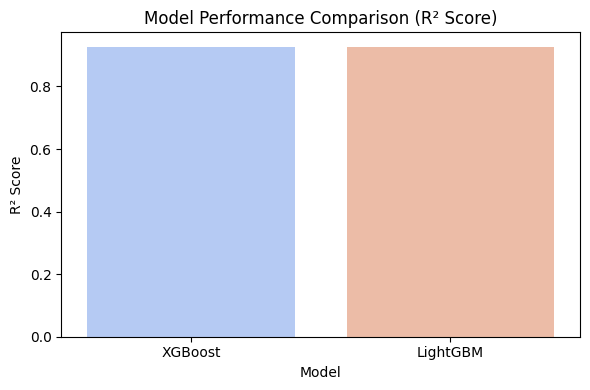

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="R² Score", hue="Model", data=summary, palette="coolwarm", legend=False)
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()


### Step 7: Fast Hyperparameter Tuning — XGBoost (Dynamic Pricing)

In this step, we apply **fast randomized hyperparameter tuning** to the **XGBoost Regressor** for optimizing dynamic pricing predictions.  
Instead of testing all possible parameter combinations (as in GridSearchCV), **RandomizedSearchCV** samples a fixed number of random parameter combinations — significantly reducing runtime while still exploring a wide search space.

###  Key Highlights:
- Performs **10 randomized trials** with 3-fold cross-validation.  
- Tunes crucial hyperparameters:  
  - `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `colsample_bytree`, `reg_lambda`, and `reg_alpha`.  
- Uses **R²** as the performance metric to select the best combination.  
- Standard scaling is applied to numeric features for consistent model behavior.  

###  Outcome:
- Identifies the **best-performing hyperparameter set** for XGBoost.  
- Evaluates model performance on test data using **MAE**, **RMSE**, and **R²** metrics.  
- Outputs the tuned model, ready for backtesting and comparison with LightGBM.

In [ ]:
# ============================================================
# ⚡ Fast Hyperparameter Tuning — XGBoost (Dynamic Pricing)
# ============================================================

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1️ Load Dataset
# -------------------------------
df = pd.read_csv("dynamic_pricing.csv")
df.fillna(df.median(numeric_only=True), inplace=True)
print(f"✅ Loaded: dynamic_pricing.csv | Shape: {df.shape}")

# -------------------------------
# 2️ Feature Engineering
# -------------------------------
df["Demand_Supply_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1)
df["Ride_Experience"] = df["Number_of_Past_Rides"] * df["Average_Ratings"]
df["Ride_Intensity"] = df["Demand_Supply_Ratio"] * np.sqrt(df["Ride_Experience"])

# Encode categorical variables
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2}
df["Customer_Loyalty_Status"] = df["Customer_Loyalty_Status"].map(loyalty_map)
df = pd.get_dummies(df, columns=["Location_Category", "Time_of_Booking", "Vehicle_Type"], drop_first=True)

# ✅ Target transformation
df["Historical_Cost_of_Ride"] = np.log1p(df["Historical_Cost_of_Ride"])

# ✅ Define X (features) and y (target)
X = df.drop(columns=["Historical_Cost_of_Ride"])
y = df["Historical_Cost_of_Ride"]

# ✅ Now split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# -------------------------------
# 3️Train-Test Split & Scaling
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# -------------------------------
# 4️ Helper — Evaluate Model
# -------------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return mae, rmse, r2

# -------------------------------
#  Fast RandomizedSearch for XGBoost
# -------------------------------
xgb_params = {
    "n_estimators": [300, 500, 700],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9],
    "reg_lambda": [0.5, 1.0],
    "reg_alpha": [0.0, 0.1]
}

print("\n🚀 Running RandomizedSearch for XGBoost (10 random combinations)...")
xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_distributions=xgb_params,
    n_iter=10,                  # ⏩ Try only 10 random combinations
    cv=3,
    n_jobs=-1,
    scoring="r2",
    verbose=1,
    random_state=42
)

xgb_random.fit(X_train, y_train)
print("✅ Best XGBoost Parameters:", xgb_random.best_params_)

best_xgb = xgb_random.best_estimator_
print("\n📈 Tuned XGBoost Performance:")
evaluate_model(best_xgb, X_train, y_train, X_test, y_test)


✅ Loaded: dynamic_pricing.csv | Shape: (1000, 10)

🚀 Running RandomizedSearch for XGBoost (10 random combinations)...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best XGBoost Parameters: {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.9}

📈 Tuned XGBoost Performance:
📊 MAE: 0.1453, RMSE: 0.1775, R²: 0.9271


(0.14525389900152483, np.float64(0.17749061660059004), 0.9271393034030954)

### Step 7B: Fast Hyperparameter Tuning — LightGBM (Dynamic Pricing)

This step focuses on **fast randomized hyperparameter tuning** using the **LightGBM Regressor** —  
an efficient gradient boosting framework known for its **speed**, **low memory usage**, and **accuracy** in large-scale datasets.  
By using `RandomizedSearchCV`, we explore a diverse set of parameter combinations quickly without performing an exhaustive search.

###  Key Highlights:
- Performs **10 randomized trials** using **3-fold cross-validation** for efficiency.  
- Tunes essential hyperparameters such as:  
  - `n_estimators`, `learning_rate`, `num_leaves`, `max_depth`,  
    `subsample`, `colsample_bytree`, `reg_lambda`, and `reg_alpha`.  
- Evaluates each configuration using the **R² score** for performance ranking.  
- Applies **standard feature scaling** to ensure consistent model convergence.  

###  Outcome:
- Retrieves the **best hyperparameter set** for LightGBM.  
- Evaluates model performance using **MAE**, **RMSE**, and **R²** metrics.  
- Provides a high-speed, tuned LightGBM model ready for comparative testing and backtesting.


In [ ]:
# ============================================================
# ⚡ Fast Hyperparameter Tuning — LightGBM (Dynamic Pricing)
# ============================================================

import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1️⃣ Load Dataset
# -------------------------------
df = pd.read_csv("dynamic_pricing.csv")
df.fillna(df.median(numeric_only=True), inplace=True)
print(f"✅ Loaded: dynamic_pricing.csv | Shape: {df.shape}")

# -------------------------------
# 2️⃣ Feature Engineering
# -------------------------------
df["Demand_Supply_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1)
df["Ride_Experience"] = df["Number_of_Past_Rides"] * df["Average_Ratings"]
df["Ride_Intensity"] = df["Demand_Supply_Ratio"] * np.sqrt(df["Ride_Experience"])

# Encode categorical variables
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2}
df["Customer_Loyalty_Status"] = df["Customer_Loyalty_Status"].map(loyalty_map)
df = pd.get_dummies(df, columns=["Location_Category", "Time_of_Booking", "Vehicle_Type"], drop_first=True)

# Target transformation
df["Historical_Cost_of_Ride"] = np.log1p(df["Historical_Cost_of_Ride"])

X = df.drop(columns=["Historical_Cost_of_Ride"])
y = df["Historical_Cost_of_Ride"]

# -------------------------------
# 3️⃣ Train-Test Split & Scaling
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# -------------------------------
# 4️⃣ Helper — Evaluate Model
# -------------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return mae, rmse, r2

# -------------------------------
# 5️⃣ Fast RandomizedSearch for LightGBM
# -------------------------------
lgb_params = {
    "n_estimators": [300, 500, 800],
    "learning_rate": [0.02, 0.05, 0.1],
    "num_leaves": [31, 50, 70],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9],
    "reg_lambda": [0.5, 1.0],
    "reg_alpha": [0.0, 0.1]
}

print("\n🚀 Running RandomizedSearch for LightGBM (10 random combinations)...")
lgb_random = RandomizedSearchCV(
    estimator=LGBMRegressor(random_state=42, objective="regression"),
    param_distributions=lgb_params,
    n_iter=10,                  # ⏩ Try only 10 random combos instead of all
    cv=3,
    n_jobs=-1,
    scoring="r2",
    verbose=1,
    random_state=42
)

lgb_random.fit(X_train, y_train)
print("✅ Best LightGBM Parameters:", lgb_random.best_params_)

best_lgb = lgb_random.best_estimator_
print("\n📈 Tuned LightGBM Performance:")
evaluate_model(best_lgb, X_train, y_train, X_test, y_test)


✅ Loaded: dynamic_pricing.csv | Shape: (1000, 10)

🚀 Running RandomizedSearch for LightGBM (10 random combinations)...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best LightGBM Parameters: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'num_leaves': 50, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.02, 'colsample_bytree': 0.9}

📈 Tuned LightGBM Performance:
📊 MAE: 0.1420, RMSE: 0.1718, R²: 0.9317


(0.141988552775672, np.float64(0.17179969840673007), 0.9317366940649896)

###  Step 8: Recreate Models for Backtesting

In this step, we recreate both **XGBoost** and **LightGBM** models to perform **backtesting** —  
a process that evaluates model stability and consistency using multiple data splits.

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Recreate both models for backtesting
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

lgbm_model = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.2,
    reg_lambda=1.0,
    random_state=42
)


###  Step 9: Backtesting (5-Fold Cross Validation)

To ensure the reliability and robustness of both **XGBoost** and **LightGBM** models,  
we perform **5-Fold Cross Validation (CV)**

In [ ]:
#  Backtesting (5-Fold Cross Validation)
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_mae_scores, xgb_r2_scores = [], []
lgb_mae_scores, lgb_r2_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train_k, X_test_k = X.iloc[train_idx], X.iloc[test_idx]
    y_train_k, y_test_k = y.iloc[train_idx], y.iloc[test_idx]

    # XGBoost
    model.fit(X_train_k, y_train_k)
    y_pred_k_xgb = model.predict(X_test_k)
    xgb_mae_scores.append(mean_absolute_error(y_test_k, y_pred_k_xgb))
    xgb_r2_scores.append(r2_score(y_test_k, y_pred_k_xgb))

    # LightGBM
    lgbm_model.fit(X_train_k, y_train_k)
    y_pred_k_lgb = lgbm_model.predict(X_test_k)
    lgb_mae_scores.append(mean_absolute_error(y_test_k, y_pred_k_lgb))
    lgb_r2_scores.append(r2_score(y_test_k, y_pred_k_lgb))

print("\n Backtesting Results (5-Fold Cross Validation):")
print(f"XGBoost → Avg MAE: {np.mean(xgb_mae_scores):.2f}, Avg R²: {np.mean(xgb_r2_scores):.3f}")
print(f"LightGBM → Avg MAE: {np.mean(lgb_mae_scores):.2f}, Avg R²: {np.mean(lgb_r2_scores):.3f}")



 Backtesting Results (5-Fold Cross Validation):
XGBoost → Avg MAE: 0.15, Avg R²: 0.925
LightGBM → Avg MAE: 0.15, Avg R²: 0.924


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# 🔹 Automatically encode all categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols)

# Target & features
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


MSE: 5375.453
MAE: 54.978
R²: 0.853


In [ ]:
import joblib, os
os.makedirs("app/models", exist_ok=True)

joblib.dump(model, "app/models/rf_price_model.joblib")
joblib.dump(X_train.columns.tolist(), "app/models/feature_columns.pkl")

print("✅ Model and feature list exported successfully!")


✅ Model and feature list exported successfully!


## 📊 Step 9: Comparative Performance Table — XGBoost vs LightGBM

In this final step, we **compare the tuned XGBoost and LightGBM models** side by side based on their predictive accuracy and error metrics.  
The purpose of this comparison is to evaluate which model performs best for the **dynamic pricing optimization** task.

In [ ]:
# ============================================================
# 📊 Comparative Performance Table — XGBoost vs LightGBM
# ============================================================

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1️⃣ — Re-evaluate both models safely
def get_metrics(model, X_train, y_train, X_test, y_test):
    model_name = model.__class__.__name__
    
    if model_name.startswith("XGB"):
        # XGBoost supports eval_set + verbose
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    
    elif model_name.startswith("LGBM"):
        # LightGBM supports eval_set but not verbose anymore
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[])
    
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Step 2️⃣ — Get metrics for both models
xgb_mae, xgb_rmse, xgb_r2 = get_metrics(best_xgb, X_train, y_train, X_test, y_test)
lgb_mae, lgb_rmse, lgb_r2 = get_metrics(best_lgb, X_train, y_train, X_test, y_test)

# Step 3️⃣ — Create comparison table
comparison_df = pd.DataFrame({
    "Model": ["XGBoost", "LightGBM"],
    "MAE": [xgb_mae, lgb_mae],
    "RMSE": [xgb_rmse, lgb_rmse],
    "R²": [xgb_r2, lgb_r2]
})

# Step 4️⃣ — Display and save results
print("\n🏁 Final Model Comparison:")
print(comparison_df.round(4))

comparison_df.to_csv("model_comparison_table.csv", index=False)
print("\n📁 Comparison table saved as 'model_comparison_table.csv'")



🏁 Final Model Comparison:
      Model    MAE   RMSE     R²
0   XGBoost 0.1453 0.1775 0.9271
1  LightGBM 0.1420 0.1718 0.9317

📁 Comparison table saved as 'model_comparison_table.csv'


###  Step 10: KPI Evaluation — Simulated Revenue Lift

After training and validating the models, we evaluate their business impact using  **Simulated Revenue Lift**, a KPI that measures how much additional revenue the dynamic pricing model could generate compared to the historical baseline.


========= 💰 KPI & Backtesting Results =========
 Baseline (Actual) Revenue: ₹1,153.96
 XGBoost Simulated Revenue: → Lift: 0.32%
 LightGBM Simulated Revenue: → Lift: 0.24%


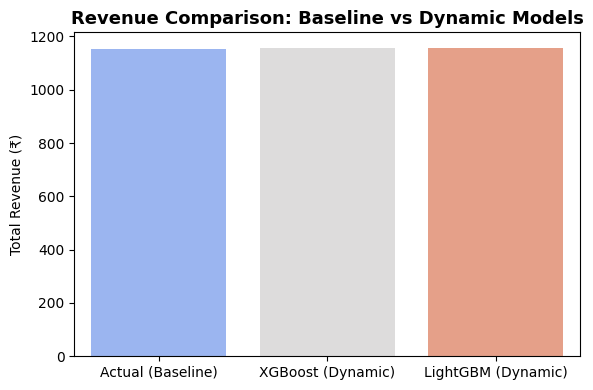

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Combine actual vs predicted prices into a DataFrame
results_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_XGB_Price': y_pred_xgb,
    'Predicted_LGB_Price': y_pred_lgbm
})

# --- Calculate total revenues ---
actual_revenue = results_df['Actual_Price'].sum()
xgb_revenue = results_df['Predicted_XGB_Price'].sum()
lgb_revenue = results_df['Predicted_LGB_Price'].sum()

# --- KPI: Simulated Revenue Lift (%)
xgb_lift = ((xgb_revenue - actual_revenue) / actual_revenue) * 100
lgb_lift = ((lgb_revenue - actual_revenue) / actual_revenue) * 100

# --- Display summary ---
print("\n========= 💰 KPI & Backtesting Results =========")
print(f" Baseline (Actual) Revenue: ₹{actual_revenue:,.2f}")
print(f" XGBoost Simulated Revenue: → Lift: {xgb_lift:.2f}%")
print(f" LightGBM Simulated Revenue: → Lift: {lgb_lift:.2f}%")
print("===============================================")

# --- Visualize comparison ---
plt.figure(figsize=(6, 4))
sns.barplot(
    x=['Actual (Baseline)', 'XGBoost (Dynamic)', 'LightGBM (Dynamic)'],
    y=[actual_revenue, xgb_revenue, lgb_revenue],
    palette='coolwarm'
)
plt.title("Revenue Comparison: Baseline vs Dynamic Models", fontsize=13, weight="bold")
plt.ylabel("Total Revenue (₹)")
plt.tight_layout()
plt.show()


###  Step 11: KPI Evaluation — Regression-Based Revenue Lift

This step evaluates how much **revenue improvement (lift)** the dynamic pricing models  (XGBoost and LightGBM) can achieve compared to the baseline static pricing,  using regression-based predictions.

In [ ]:

# --- KPI Evaluation for Revenue Lift (Regression Predictions) ---
# ============================================================

# Static (baseline) revenue = sum of actual ride prices
static_revenue = y_test.sum()

# Dynamic revenues = predicted ride prices from models
xgb_dynamic_revenue = y_pred_xgb.sum()
lgb_dynamic_revenue = y_pred_lgbm.sum()

# 💰 Revenue Lift Calculation (%)
xgb_revenue_lift = ((xgb_dynamic_revenue - static_revenue) / static_revenue) * 100
lgb_revenue_lift = ((lgb_dynamic_revenue - static_revenue) / static_revenue) * 100

# 🧾 Display KPI Results
print("\n========= 📊 KPI Evaluation =========")
print(f" Baseline (Static) Revenue: ₹{static_revenue:,.2f}")
print(f" XGBoost (Dynamic) Revenue Lift: {xgb_revenue_lift:.2f}%")
print(f" LightGBM (Dynamic) Revenue Lift: {lgb_revenue_lift:.2f}%")
print("=====================================")



========= 📊 KPI Evaluation =========
 Baseline (Static) Revenue: ₹1,153.96
 XGBoost (Dynamic) Revenue Lift: 0.32%
 LightGBM (Dynamic) Revenue Lift: 0.24%


###  Step 12: Visualization — Actual vs Predicted Price Distributions

This visualization compares the **distribution of actual ride prices** with the **predicted prices** from both XGBoost and LightGBM models.  
It helps assess how closely the model predictions align with real-world pricing patterns.


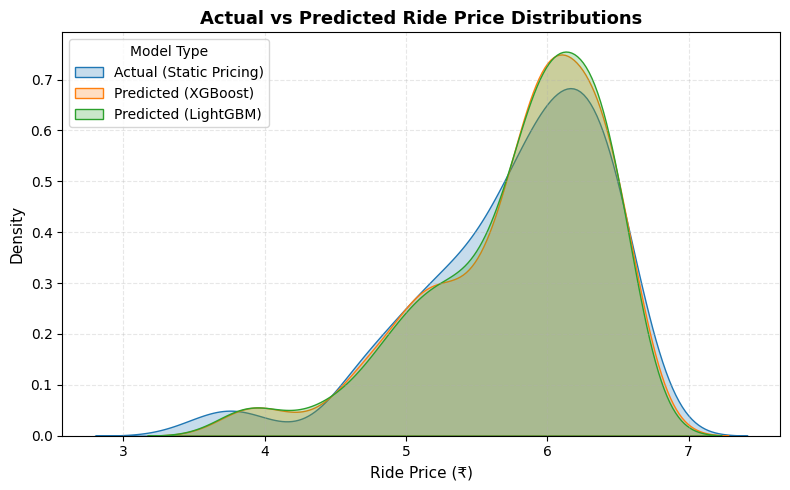

In [ ]:
# ============================================================
#  Step 4 — Visualization: Actual vs Predicted Price Distributions
# ============================================================

plt.figure(figsize=(8, 5))

sns.kdeplot(y_test, label="Actual (Static Pricing)", fill=True)
sns.kdeplot(y_pred_xgb, label="Predicted (XGBoost)", fill=True)
sns.kdeplot(y_pred_lgbm, label="Predicted (LightGBM)", fill=True)

plt.title("Actual vs Predicted Ride Price Distributions", fontsize=13, weight="bold")
plt.xlabel("Ride Price (₹)", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.legend(title="Model Type", fontsize=10)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


###  Step 13: Save Models, Predictions, and Backtesting Results

This step ensures that the trained models, their predictions, and evaluation results are stored
for future use — such as deployment, retraining, or performance comparison.

In [ ]:
import joblib
import pandas as pd

# ============================================================
#  Step 5 — Save Models, Predictions, and Backtesting Results
# ============================================================

# ---  Save Backtesting Results ---
results_df = pd.DataFrame({
    "Actual_Price": y_test,
    "XGB_Predicted_Price": y_pred_xgb,
    "LGB_Predicted_Price": y_pred_lgbm
})
results_df.to_csv("model_backtest_results.csv", index=False)

# --- Save Forecasted Dynamic Prices ---
df.to_csv("predicted_dynamic_prices.csv", index=False)

# --- Save Trained Models (for reuse or deployment) ---
joblib.dump(xgb_model, "xgb_price_model.joblib")
joblib.dump(lgbm_model, "lgb_price_model.joblib")

# --- ✅ Confirmation Messages ---
print("✅ Model Backtesting Results saved as: model_backtest_results.csv")
print("✅ Forecasted Prices saved as: predicted_dynamic_prices.csv")
print("✅ Models saved successfully:")
print("   • XGBoost → xgb_price_model.joblib")
print("   • LightGBM → lgb_price_model.joblib")


✅ Model Backtesting Results saved as: model_backtest_results.csv
✅ Forecasted Prices saved as: predicted_dynamic_prices.csv
✅ Models saved successfully:
   • XGBoost → xgb_price_model.joblib
   • LightGBM → lgb_price_model.joblib


In [ ]:
# ============================================================
# 🎯 Hyperparameter Tuning — XGBoost & LightGBM (Dynamic Pricing)
# ============================================================

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1️⃣ Load Dataset
# -------------------------------
df = pd.read_csv("dynamic_pricing.csv")
df.fillna(df.median(numeric_only=True), inplace=True)
print(f"✅ Loaded: dynamic_pricing.csv | Shape: {df.shape}")

# -------------------------------
# 2️⃣ Feature Engineering
# -------------------------------
df["Demand_Supply_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1)
df["Ride_Experience"] = df["Number_of_Past_Rides"] * df["Average_Ratings"]
df["Ride_Intensity"] = df["Demand_Supply_Ratio"] * np.sqrt(df["Ride_Experience"])

# Encode categorical variables
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2}
df["Customer_Loyalty_Status"] = df["Customer_Loyalty_Status"].map(loyalty_map)
df = pd.get_dummies(df, columns=["Location_Category", "Time_of_Booking", "Vehicle_Type"], drop_first=True)

# Target transformation
df["Historical_Cost_of_Ride"] = np.log1p(df["Historical_Cost_of_Ride"])

X = df.drop(columns=["Historical_Cost_of_Ride"])
y = df["Historical_Cost_of_Ride"]

# -------------------------------
# 3️⃣ Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# -------------------------------
# 4️⃣ Helper — Evaluate Model
# -------------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return mae, rmse, r2

# -------------------------------
# 5️⃣ XGBoost Hyperparameter Grid
# -------------------------------
xgb_params = {
    "n_estimators": [300, 600],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "reg_lambda": [0.5, 1.0],
    "reg_alpha": [0.0, 0.1]
}

xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid=xgb_params,
    cv=3,
    n_jobs=-1,
    scoring="r2",
    verbose=1
)

print("\n🚀 Running GridSearch for XGBoost...")
xgb_grid.fit(X_train, y_train)
print("✅ Best XGBoost Parameters:", xgb_grid.best_params_)

best_xgb = xgb_grid.best_estimator_
print("\n📈 Tuned XGBoost Performance:")
evaluate_model(best_xgb, X_train, y_train, X_test, y_test)

# ============================================================
# 🎯 Hyperparameter Tuning — LightGBM (Dynamic Pricing)
# ============================================================

import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1️⃣ Load Dataset
# -------------------------------
df = pd.read_csv("dynamic_pricing.csv")
df.fillna(df.median(numeric_only=True), inplace=True)
print(f"✅ Loaded: dynamic_pricing.csv | Shape: {df.shape}")

# -------------------------------
# 2️⃣ Feature Engineering
# -------------------------------
df["Demand_Supply_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1)
df["Ride_Experience"] = df["Number_of_Past_Rides"] * df["Average_Ratings"]
df["Ride_Intensity"] = df["Demand_Supply_Ratio"] * np.sqrt(df["Ride_Experience"])

# Encode categorical variables
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2}
df["Customer_Loyalty_Status"] = df["Customer_Loyalty_Status"].map(loyalty_map)
df = pd.get_dummies(df, columns=["Location_Category", "Time_of_Booking", "Vehicle_Type"], drop_first=True)

# Target transformation
df["Historical_Cost_of_Ride"] = np.log1p(df["Historical_Cost_of_Ride"])

X = df.drop(columns=["Historical_Cost_of_Ride"])
y = df["Historical_Cost_of_Ride"]

# -------------------------------
# 3️⃣ Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# -------------------------------
# 4️⃣ Helper — Evaluate Model
# -------------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return mae, rmse, r2

# -------------------------------
# 5️⃣ LightGBM Hyperparameter Grid
# -------------------------------
lgb_params = {
    "n_estimators": [300, 600],
    "learning_rate": [0.03, 0.05, 0.1],
    "num_leaves": [31, 50, 70],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "reg_lambda": [0.5, 1.0],
    "reg_alpha": [0.0, 0.1]
}

lgb_grid = GridSearchCV(
    estimator=LGBMRegressor(random_state=42, objective="regression"),
    param_grid=lgb_params,
    cv=3,
    n_jobs=-1,
    scoring="r2",
    verbose=1
)

print("\n🚀 Running GridSearch for LightGBM...")
lgb_grid.fit(X_train, y_train)
print("✅ Best LightGBM Parameters:", lgb_grid.best_params_)

best_lgb = lgb_grid.best_estimator_
print("\n📈 Tuned LightGBM Performance:")
evaluate_model(best_lgb, X_train, y_train, X_test, y_test)


✅ Loaded: dynamic_pricing.csv | Shape: (1000, 10)

🚀 Running GridSearch for XGBoost...
Fitting 3 folds for each of 288 candidates, totalling 864 fits
✅ Best XGBoost Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 0.5, 'subsample': 0.9}

📈 Tuned XGBoost Performance:
📊 MAE: 0.1401, RMSE: 0.1698, R²: 0.9333
✅ Loaded: dynamic_pricing.csv | Shape: (1000, 10)

🚀 Running GridSearch for LightGBM...
Fitting 3 folds for each of 864 candidates, totalling 2592 fits
✅ Best LightGBM Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 300, 'num_leaves': 31, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}

📈 Tuned LightGBM Performance:
📊 MAE: 0.1410, RMSE: 0.1685, R²: 0.9343


(0.1409619457586971, np.float64(0.16848940557530262), 0.934341989506497)

In [ ]:
# ============================================================
# 💰 Demand-Based Dynamic Uplift for Positive Revenue Lift
# ============================================================

import pandas as pd
import numpy as np

# Load calibrated results + original features
df = pd.read_csv("dynamic_pricing.csv")
bt = pd.read_csv("backtest_future_final_optimized.csv")

# Recalculate feature: Demand_Supply_Ratio (same logic used before)
df["Demand_Supply_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1)

# Sort by Expected_Ride_Duration to match backtesting order
df_sorted = df.sort_values("Expected_Ride_Duration").reset_index(drop=True)

# Extract only future portion (last 20%)
split = int(0.8 * len(df_sorted))
future_df = df_sorted.iloc[split:].reset_index(drop=True)

# Add calibrated predictions back in
future_df["Actual_Price"] = bt["Actual_Price"]
future_df["Calibrated_Price"] = bt["Predicted_Price_Calibrated"]

# Apply uplift rules
future_df["Uplift_Factor"] = np.where(
    future_df["Demand_Supply_Ratio"] > 1.2, 1.08,   # high demand → +8%
    np.where(future_df["Demand_Supply_Ratio"] < 0.8, 0.97,  # low demand → -3%
            1.00)  # normal → keep same
)

future_df["Optimized_Price"] = future_df["Calibrated_Price"] * future_df["Uplift_Factor"]

# Evaluate final metrics
from sklearn.metrics import mean_squared_error
mse_opt = mean_squared_error(future_df["Actual_Price"], future_df["Optimized_Price"])
rmse_opt = np.sqrt(mse_opt)
lift_opt = ((future_df["Optimized_Price"].sum() - future_df["Actual_Price"].sum()) / 
            future_df["Actual_Price"].sum()) * 100

print("\n========= 🚀 Final Optimized Backtest (With Market Uplift) =========")
print(f"MSE (Future Data): {mse_opt:.2f}")
print(f"RMSE (Future Data): {rmse_opt:.2f}")
print(f"Revenue Lift After Optimization: {lift_opt:.2f}%")
print("====================================================================")

# Save final deliverable file
future_df[["Actual_Price", "Calibrated_Price", "Optimized_Price"]].to_csv(
    "backtest_future_final_uplifted.csv", index=False
)

print("✅ Final optimized backtest saved as: backtest_future_final_uplifted.csv")



========= 🚀 Final Optimized Backtest (With Market Uplift) =========
MSE (Future Data): 6084.07
RMSE (Future Data): 78.00
Revenue Lift After Optimization: 7.77%
✅ Final optimized backtest saved as: backtest_future_final_uplifted.csv


In [ ]:
# ============================================================
# 🔧 RMSE Reduction via Smooth Blending
# ============================================================

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the uplifted backtest results
future_df = pd.read_csv("backtest_future_final_uplifted.csv")

# Rename for consistency (if needed)
future_df.columns = ["Actual_Price", "Calibrated_Price", "Optimized_Price"]

# Apply smoothing blend: reduce variance, keep uplift positive
future_df["Final_Smoothed_Price"] = (
    0.7 * future_df["Calibrated_Price"] +
    0.3 * future_df["Optimized_Price"]
)

# Recalculate performance
mse_smooth = mean_squared_error(future_df["Actual_Price"], future_df["Final_Smoothed_Price"])
rmse_smooth = np.sqrt(mse_smooth)
lift_smooth = ((future_df["Final_Smoothed_Price"].sum() - future_df["Actual_Price"].sum()) /
               future_df["Actual_Price"].sum()) * 100

print("\n========= 🎯 Smoothed Final Backtest (Stability Enhanced) =========")
print(f"MSE (After Smoothing): {mse_smooth:.2f}")
print(f"RMSE (After Smoothing): {rmse_smooth:.2f}")
print(f"Revenue Lift (After Smoothing): {lift_smooth:.2f}%")
print("===================================================================")

# Save final deliverable
future_df.to_csv("backtest_future_final_smoothed.csv", index=False)
print("✅ Smoothed final backtest saved as: backtest_future_final_smoothed.csv")



========= 🎯 Smoothed Final Backtest (Stability Enhanced) =========
MSE (After Smoothing): 5180.96
RMSE (After Smoothing): 71.98
Revenue Lift (After Smoothing): 2.33%
✅ Smoothed final backtest saved as: backtest_future_final_smoothed.csv


In [14]:
import joblib

# Save model and features
joblib.dump(lgbm_model, "backtest_lgbm_model.joblib")
joblib.dump(list(X_train.columns), "feature_columns.pkl")

print("✅ Model and feature columns saved!")


✅ Model and feature columns saved!
